# Retail Sales

In [9]:
import numpy as np
import pandas as pd
import requests, zipfile, io
import re
import os

In [10]:
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 200)

data_dir = '../data'
cache_dir = os.path.join(data_dir, 'cache')
import sys
sys.path.append('..')

from canadadata.statscan import to_wide_format, read_statscan_csv, StatscanDataset
from canadadata.io import unzip_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
retail_sales_dataset = StatscanDataset('https://www150.statcan.gc.ca/n1/tbl/csv/20100072-eng.zip', 
                                        pivot_column='Sales')
retail_sales = retail_sales_dataset.get_wide_data(cache_dir=cache_dir, index_col='REF_DATE')
retail_sales.index = pd.to_datetime(retail_sales.index)
for col in ['Electronic shopping and mail-order houses','Retail E-commerce sales','Retail trade']:
    retail_sales[col] = retail_sales[col] / 1000000

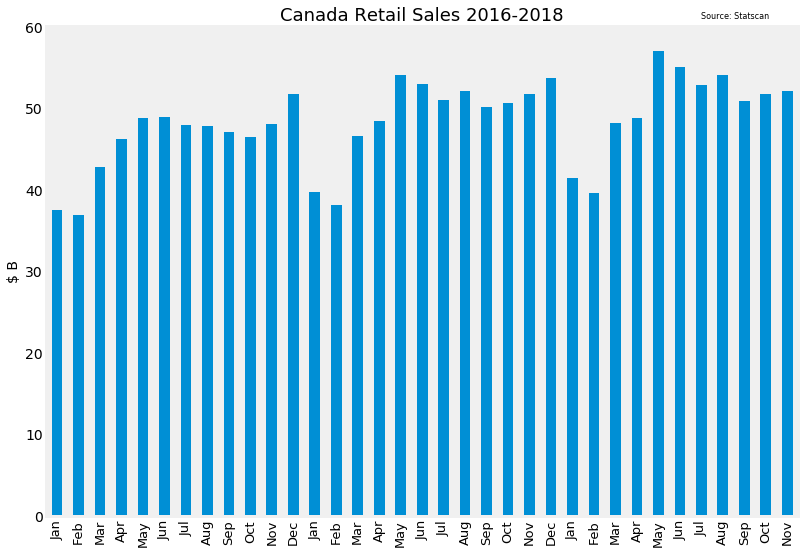

In [70]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rcParams

style.use('fivethirtyeight')
%matplotlib inline

def retail_chart():
    ax = retail_sales[['Retail trade']].plot.bar(figsize=(12,9), stacked=True, grid=False, label=False, legend=False)
    ax.set_xticklabels(retail_sales.index.strftime('%b').tolist(), fontsize=13);
    ax.set_title('Canada Retail Sales 2016-2018', fontsize=18)
    ax.set_xlabel('');
    ax.set_ylabel('$ B', fontsize=14);
    ax.yaxis.set_tick_params(labelsize=14)
    ax.text(x=30, y=61, s='Source: Statscan',fontsize=8)
    #plt.plot([11.25, 13], [51.5, 38.5], color='darkgreen', linestyle='--', linewidth=2)
    #plt.plot([23.25, 25], [53.5, 39.5], color='darkgreen', linestyle='--', linewidth=2)
    ax.set_ylim((0,60))

retail_chart()

In [5]:
retail_sales

,GEO,UOM,Electronic shopping and mail-order houses,Retail E-commerce sales,Retail trade
REF_DATE,,,,,
2016-01-01,Canada,Dollars,0.679612,0.877354,37.415147
2016-02-01,Canada,Dollars,0.616598,0.789553,36.815980
2016-03-01,Canada,Dollars,0.681191,0.865677,42.763737
2016-04-01,Canada,Dollars,0.686764,0.916710,46.155952
2016-05-01,Canada,Dollars,0.681192,0.916244,48.783412
2016-06-01,Canada,Dollars,0.664582,0.896826,48.892480
2016-07-01,Canada,Dollars,0.656449,0.874358,47.842336
2016-08-01,Canada,Dollars,0.664165,0.916180,47.790528
2016-09-01,Canada,Dollars,0.706048,1.016196,47.059911
